<span style="font-family: Open Sans; font-weight: 800; font-size: 40px; font-style: normal; text-align:center;">

Especialización Inteligecia Artificial - CEIA

</span>

<span style="font-family: Open Sans; font-weight: 700; font-size: 50px; font-style: normal; text-align:center;">

Análisis de datos 

Trabajo práctico integrador

</span>

<span style="font-family: Open Sans; font-weight: 400; font-size: 30px; font-style: normal;">

<u>Autores</u>:
- Karen Raczkowski
- Juan Ignacio Ribet
- FS

</span>

<span style="font-family: Open Sans; font-weight: 400; font-size: 30px; font-style: normal">

# LEGO Database

 - ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
 - ¿Podría predecir a que temática pertenece un set basado en el contenido de este?

 </span>
 

 ![Data set Schema](https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png)

<span style="font-family: Open Sans; font-weight: 100; font-size: 20px; font-style: normal;">

Para responder las preguntas planteadas vamos a utilizar los siguientes datasets que nos van a dar la información de lo que contiene cada set de Lego:

- themes
- sets
- inventories
- inventory_parts
- colors
- parts
- part_categories

</span>

### Importamos las librerías necesarias para el trabajo.

In [123]:
# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import plotly.express as px

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#Categorical transformations
import category_encoders as ce
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import LabelEncoder


# Partición de train-test set
from sklearn.model_selection import train_test_split

# Pipelines
from sklearn.pipeline import Pipeline

# Crear datasets
from sklearn.datasets import make_regression

# Training schemas
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold

from functools import reduce

from sklearn.feature_extraction import FeatureHasher

In [124]:
#Cargamos las urls donde se encuentran los datasets. Links obtenidos de https://rebrickable.com/downloads/

url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_sets ='https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'


# url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
# url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'
# url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
# url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
# url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'

In [125]:
#Creamos los DataFrames

themes = pd.read_csv(url_themes, delimiter=',') #(3.9 KB)
sets = pd.read_csv(url_sets, delimiter=',') #(379.9 KB)
inventories = pd.read_csv(url_inventories, delimiter=',') #(194.1 KB)
inventory_parts = pd.read_csv(url_inventory_parts, delimiter=',') #(9.9 MB)
colors = pd.read_csv(url_colors, delimiter=',') #(2.5 KB)
parts = pd.read_csv(url_parts, delimiter=',') #(839.0 KB)
part_categories = pd.read_csv(url_part_categories, delimiter=',') #(725 bytes)

# inventory_sets = pd.read_csv(url_inventory_sets, delimiter=',') #(14.1 KB)
# inventory_minifigs = pd.read_csv(url_inventory_minifigs, delimiter=',') #(76.2 KB)
# minifigs = pd.read_csv(url_minifigs, delimiter=',') #(223.2 KB)
# part_relationships = pd.read_csv(url_part_relationships, delimiter=',') #(149.0 KB)
# elements = pd.read_csv(url_elements, delimiter=',') #(586.8 KB)

In [126]:
# Opcional: correr esto si arriba da SSLCertVerificationError

import urllib.request
import gzip
import ssl

# Create an SSL context with certificate verification disabled
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Specify the URLs of the datasets
url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
url_sets = 'https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

try:
    # Read the compressed CSV data with SSL context
    themes_data = urllib.request.urlopen(url_themes, context=ssl_context)
    colors_data = urllib.request.urlopen(url_colors, context=ssl_context)
    part_categories_data = urllib.request.urlopen(url_part_categories, context=ssl_context)
    parts_data = urllib.request.urlopen(url_parts, context=ssl_context)
    part_relationships_data = urllib.request.urlopen(url_part_relationships, context=ssl_context)
    elements_data = urllib.request.urlopen(url_elements, context=ssl_context)
    sets_data = urllib.request.urlopen(url_sets, context=ssl_context)
    minifigs_data = urllib.request.urlopen(url_minifigs, context=ssl_context)
    inventories_data = urllib.request.urlopen(url_inventories, context=ssl_context)
    inventory_parts_data = urllib.request.urlopen(url_inventory_parts, context=ssl_context)
    inventory_sets_data = urllib.request.urlopen(url_inventory_sets, context=ssl_context)
    inventory_minifigs_data = urllib.request.urlopen(url_inventory_minifigs, context=ssl_context)

    # Decompress the data and read into DataFrames
    themes = pd.read_csv(gzip.GzipFile(fileobj=themes_data), delimiter=',')
    colors = pd.read_csv(gzip.GzipFile(fileobj=colors_data), delimiter=',')
    part_categories = pd.read_csv(gzip.GzipFile(fileobj=part_categories_data), delimiter=',')
    parts = pd.read_csv(gzip.GzipFile(fileobj=parts_data), delimiter=',')
    part_relationships = pd.read_csv(gzip.GzipFile(fileobj=part_relationships_data), delimiter=',')
    elements = pd.read_csv(gzip.GzipFile(fileobj=elements_data), delimiter=',')
    sets = pd.read_csv(gzip.GzipFile(fileobj=sets_data), delimiter=',')
    minifigs = pd.read_csv(gzip.GzipFile(fileobj=minifigs_data), delimiter=',')
    inventories = pd.read_csv(gzip.GzipFile(fileobj=inventories_data), delimiter=',')
    inventory_parts = pd.read_csv(gzip.GzipFile(fileobj=inventory_parts_data), delimiter=',')
    inventory_sets = pd.read_csv(gzip.GzipFile(fileobj=inventory_sets_data), delimiter=',')
    inventory_minifigs = pd.read_csv(gzip.GzipFile(fileobj=inventory_minifigs_data), delimiter=',')                                           

except urllib.error.URLError as e:
    print("An error occurred while accessing the URL:", e)

## Análisis básico de los datasets

En esta sección, exploramos la informacion que contiene cada DataFrame que vamos a utilizar.

Themes: Este dataset incluye información sobre temas de Lego. Cada tema recibe un número de identificación único ("id"), un nombre ("name") y (si es parte de un tema más grande) de qué tema es parte ("parent_id").

In [127]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [128]:
#Verificamos valores nulos
themes.isnull().sum()

id             0
name           0
parent_id    144
dtype: int64

In [129]:
#Verificamos tipos de variables
themes.dtypes

id             int64
name          object
parent_id    float64
dtype: object

In [130]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in themes.columns:
    print(i,':',   len(themes[i].unique()))

id : 465
name : 382
parent_id : 56


Sets: Este archivo contiene información sobre los sets de LEGO, incluido un número de identificación único para cada set ("set_num"), el nombre del set ("name"), el año en que se lanzó ("year"), su tema ("theme_id"), cuántas partes incluye ("num_parts") y URL que contienen fotos de cada set ("img_url").

In [131]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [132]:
#Verificamos valores nulos
sets.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
img_url      0
dtype: int64

In [133]:
#Verificamos tipos de variables
sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
img_url      object
dtype: object

In [134]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in sets.columns:
    print(i,':',   len(sets[i].unique()))

set_num : 21291
name : 18213
year : 73
theme_id : 458
num_parts : 1429
img_url : 21291


Inventories: Esta tabla contiene información sobre inventarios, incluida una identificación única ("id"), su versión ("version") y el número del set ("set_num").

In [135]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [136]:
#Verificamos valores nulos
inventories.isnull().sum()

id         0
version    0
set_num    0
dtype: int64

In [137]:
#Verificamos tipos de variables
inventories.dtypes

id          int64
version     int64
set_num    object
dtype: object

In [138]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in inventories.columns:
    print(i,':',   len(inventories[i].unique()))

id : 36291
version : 16
set_num : 34675


Inventory_parts: Este dataset contiene información sobre los inventarios de piezas, incluido un número de identificación único ("inventory_id"), el número de pieza ("part_num"), el color de la pieza ("color_id"), cuántas de ellas se incluyen ("quantity") y si se trata de un repuesto ("is_spare").

In [139]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN


In [140]:
#Verificamos valores nulos
inventory_parts.isnull().sum()

inventory_id       0
part_num           0
color_id           0
quantity           0
is_spare           0
img_url         8236
dtype: int64

In [141]:
#Verificamos tipos de variables
inventory_parts.dtypes

inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
img_url         object
dtype: object

In [142]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in inventory_parts.columns:
    print(i,':',   len(inventory_parts[i].unique()))

inventory_id : 31764
part_num : 50049
color_id : 212
quantity : 379
is_spare : 2
img_url : 72682


Parts: Este dataset incluye información sobre piezas de lego, incluido un número de identificación único para cada pieza ("part_num"), el nombre de la pieza ("name"), la categoría de la que proviene ("part_cat_id") y su material ("part_material").

In [143]:
parts.head()

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic


In [144]:
#Verificamos valores nulos
parts.isnull().sum()

part_num         0
name             0
part_cat_id      0
part_material    0
dtype: int64

In [145]:
#Verificamos tipos de variables
parts.dtypes

part_num         object
name             object
part_cat_id       int64
part_material    object
dtype: object

In [146]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in parts.columns:
    print(i,':',   len(parts[i].unique()))

part_num : 51604
name : 51099
part_cat_id : 66
part_material : 6


Colors: Esta data contiene información sobre los colores de LEGO, incluida una identificación única para cada color ("id"), su nombre ("name") y el valor RGB aproximado ("rgb"), y si es transparente ("is_trans").

In [147]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [148]:
#Verificamos valores nulos
colors.isnull().sum()

id          0
name        0
rgb         0
is_trans    0
dtype: int64

In [149]:
#Verificamos tipos de variables
colors.dtypes

id           int64
name        object
rgb         object
is_trans    object
dtype: object

In [150]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in colors.columns:
    print(i,':',   len(colors[i].unique()))

id : 223
name : 223
rgb : 194
is_trans : 2


Part_categories: Este dataset incluye información sobre la categoría de la pieza ("name") y una identificación única para esa categoría de pieza ("id").

In [151]:
part_categories.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [152]:
#Verificamos los valores nulos
part_categories.isnull().sum()

id      0
name    0
dtype: int64

In [153]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in part_categories.columns:
    print(i,':',   len(part_categories[i].unique()))

id : 66
name : 66


## ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?

Para responder la primera pregunta utilizamos la informacion del DataFrame 'sets'.

In [154]:
year = sets['year'].sort_values().unique()

#Calculamos la media de cantidad de piezas de cada set por año y armamos un dataframe
sets_mean_size_year = np.array(sets[['year','num_parts']].groupby(by='year').mean())[:,0].round(0)
sets_size_evolution = pd.DataFrame(sets_mean_size_year, year, columns=['sets_mean_size'])
sets_size_evolution

,sets_mean_size
1949,100.0
1950,1.0
1953,12.0
1954,8.0
1955,12.0
...,...
2019,189.0
2020,210.0
2021,233.0
2022,284.0


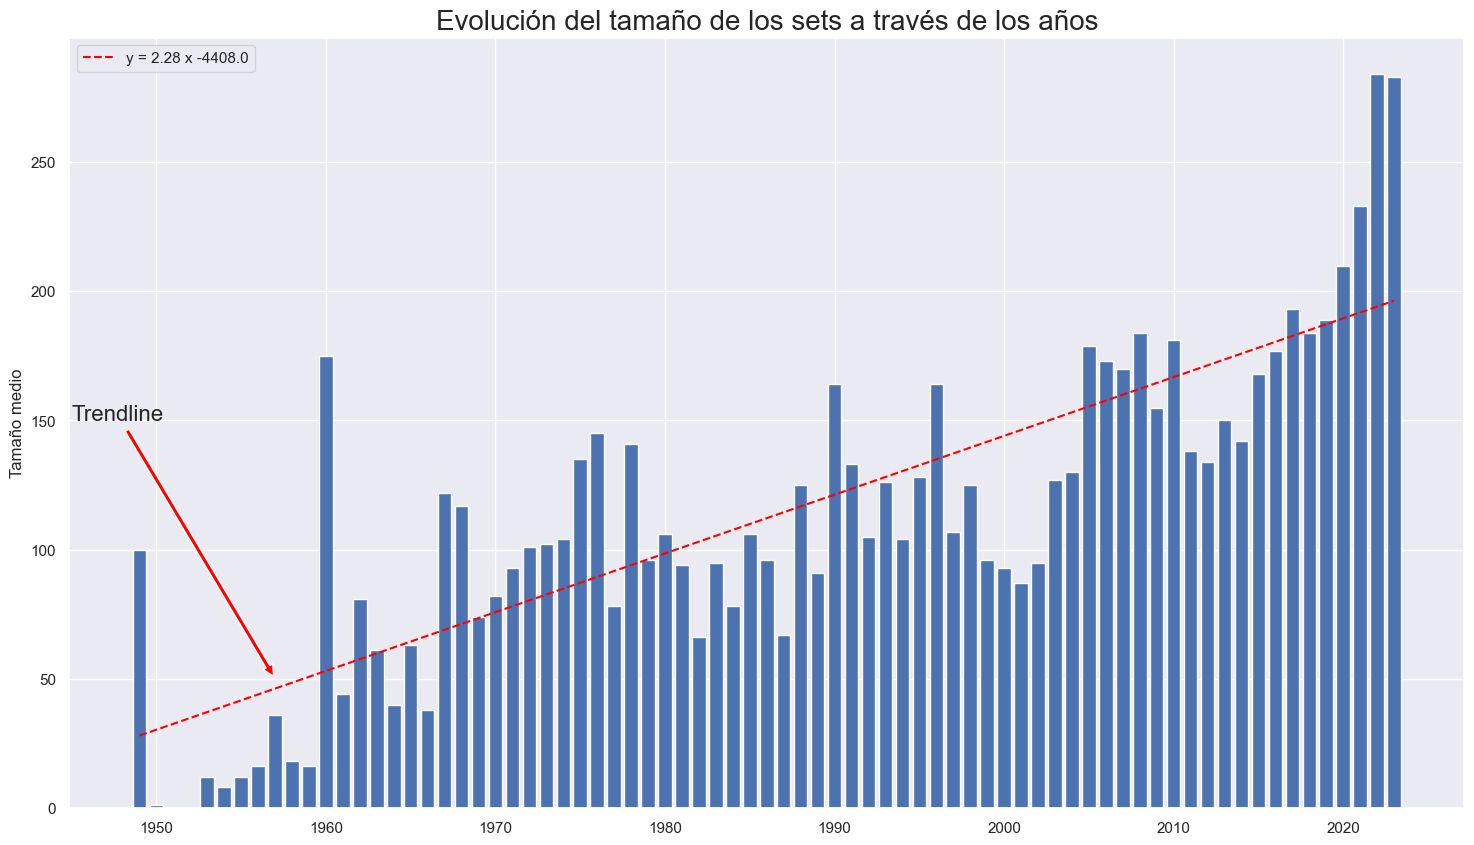

In [155]:
#Graficamos la evolución de la cantidad de piezas media por año.

z = np.polyfit(year, sets_mean_size_year, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(18,10))
ax.bar(year, sets_mean_size_year)
ax.set_ylabel('Tamaño medio')
ax.plot(year, p(year), c='red', linestyle='dashed', label = f'y = {p.c.round(2)[0]} x {p.c.round(0)[1]}')
ax.set_title('Evolución del tamaño de los sets a través de los años',fontsize=20)
ax.annotate('Trendline',(1957,50), xytext=(1945,150), fontsize=16, arrowprops=dict(arrowstyle='simple', facecolor='red'))
ax.legend(loc='upper left')
plt.show()

Se puede observar en el grafico como la media de la cantidad de piezas de cada set fue evolucionando a través de los años. La línea de tendencia es creciente con la fórmula mostrada.

## ¿Podría predecir a que temática pertenece un set basado en el contenido de este?

Para responder esta pregunta vamos a unir los DataFrames para poder obtener información sobre qué piezas contiene cada set y las características de las mismas.

Antes de eso, vamos a realizar una exploracion de los datasets con un ejemplo para poder entender cómo obtener la información.

In [156]:
#Buscamos un ejemplo de set en 'sets', elegimos un set icónico como es la torre Eiffel.
sets[sets['set_num'] == '10307-1']

,set_num,name,year,theme_id,num_parts,img_url
399,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...


<img src="https://cdn.rebrickable.com/media/sets/10307-1.jpg"  width="300" height="600">

In [157]:
#Buscamos el mismo set en 'inventories'
inventories[inventories['set_num'] == '10307-1']

,id,version,set_num
34049,150356,1,10307-1


In [158]:
#Tomamos el id de 'inventories' y observamos que piezas contiene.
inventory_parts[inventory_parts['inventory_id'] == 150356]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
1087736,150356,11090,72,32,f,https://cdn.rebrickable.com/media/parts/elemen...
1087737,150356,11153,72,8,f,https://cdn.rebrickable.com/media/parts/elemen...
1087738,150356,11203,72,8,f,https://cdn.rebrickable.com/media/parts/elemen...
1087739,150356,11211,71,4,f,https://cdn.rebrickable.com/media/parts/elemen...
1087740,150356,11212,72,20,f,https://cdn.rebrickable.com/media/parts/elemen...
...,...,...,...,...,...,...
1088041,150356,98138,72,4,f,https://cdn.rebrickable.com/media/parts/elemen...
1088042,150356,99563,72,72,f,https://cdn.rebrickable.com/media/parts/elemen...
1088043,150356,99780,72,20,f,https://cdn.rebrickable.com/media/parts/elemen...
1088044,150356,99781,71,2,f,https://cdn.rebrickable.com/media/parts/elemen...


In [159]:
#Verificamos que la suma de las partes da el total de piezas que figuraba en 'sets'.
inventory_parts[(inventory_parts['inventory_id'] == 150356) & (inventory_parts['is_spare'] == 'f')]['quantity'].sum()

10001

Para poder relacionar las temáticas con lo que contiene cada set es necesario unir primero el dataset 'themes' con 'set'.

Primero vamos a asociar las temáticas "hijas" con los nombres de las temáticas "padres" para reducir la variabilidad en el conjunto de temas.

In [160]:
#Los valores NaN son las tematicas 'padres'.
D = {}
for i , j in zip(themes[themes['parent_id'].isnull()]['id'], themes[themes['parent_id'].isnull()]['name']):
    D[i] = j
names = themes['name'].copy()
themes['themes_parent_name'] = names
themes

for i, j in D.items(): 
    themes.loc[themes['parent_id'] == i, 'themes_parent_name'] = j

themes

,id,name,parent_id,themes_parent_name
0,1,Technic,NaN,Technic
1,3,Competition,1.0,Technic
2,4,Expert Builder,1.0,Technic
3,16,RoboRiders,1.0,Technic
4,17,Speed Slammers,1.0,Technic
...,...,...,...,...
460,745,Disney 100,535.0,Collectible Minifigures
461,746,Database Sets,301.0,Other
462,747,Sonic The Hedgehog,NaN,Sonic The Hedgehog
463,748,Gabby’s Dollshouse,NaN,Gabby’s Dollshouse


In [161]:
#Eliminamos la columna 'name' y cambiamos los valores NaN por 0.
themes = themes.drop(columns='name')
themes['parent_id'] = themes['parent_id'].fillna(0)
themes['parent_id'] = themes['parent_id'].astype('int64')
themes

,id,parent_id,themes_parent_name
0,1,0,Technic
1,3,1,Technic
2,4,1,Technic
3,16,1,Technic
4,17,1,Technic
...,...,...,...
460,745,535,Collectible Minifigures
461,746,301,Other
462,747,0,Sonic The Hedgehog
463,748,0,Gabby’s Dollshouse


A continuación, unimos los datasets mencionados anteriormente.

In [162]:
#Cambiamos los nombres de las columnas 'id' y 'name' por 'theme_id' y 'theme_name' en el data set 'themes'.
themes.rename(columns = {'id':'theme_id', 'name':'theme_name'}, inplace = True)

#Unimos los datasets 'sets' con 'themes' por la columna "theme_id" en el nuevo dataset 'sets_themes'
sets_themes = pd.merge(sets, themes, on="theme_id")
sets_themes

,set_num,name,year,theme_id,num_parts,img_url,parent_id,themes_parent_name
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,0,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,0,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,0,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,0,Technic
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,0,Technic
...,...,...,...,...,...,...,...,...
21286,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-256...,0,Modulex
21287,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,0,Modulex
21288,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,0,Modulex
21289,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-258...,0,Modulex


In [163]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('themes', themes.shape)
print('sets', sets.shape)
print('sets_themes', sets_themes.shape)

themes (465, 3)
sets (21291, 6)
sets_themes (21291, 8)


Del nuevo conjunto de datos, nos interesa conservar sólo las columnas 'set_num' y 'themes_parent_name'.

La variable 'themes_parent_name' va a ser nuestro target en el dataset final, ya que queremos predecir a qué tema pertenece un set de Lego.

In [164]:
#Armamos un dataset que tenga solo el número de set y la temática padre a la que pertenece.
set_num_themes_parent_name = sets_themes[['set_num', 'themes_parent_name']].copy()
set_num_themes_parent_name

,set_num,themes_parent_name
0,001-1,Technic
1,002-1,Technic
2,1030-1,Technic
3,1038-1,Technic
4,1039-1,Technic
...,...,...
21286,M20-2566-10,Modulex
21287,M20-2575-10,Modulex
21288,M20-2576-10,Modulex
21289,M20-2586-10,Modulex


In [165]:
#Al dataset 'inventories' le agregamos el nombre de la temática padre a la cual pertenece esa versión de set. Lo hacemos de esta manera y no con merge para evitar perder información.
for i, j in zip(set_num_themes_parent_name['set_num'], set_num_themes_parent_name['themes_parent_name']): 
    inventories.loc[inventories['set_num'] == i, 'themes_parent_name'] = j

inventories

,id,version,set_num,themes_parent_name
0,1,1,7922-1,Sports
1,3,1,3931-1,Friends
2,4,1,6942-1,Space
3,15,1,5158-1,Service Packs
4,16,1,903-1,System
...,...,...,...,...
36286,178943,1,fig-014014,NaN
36287,178944,1,fig-014015,NaN
36288,178945,1,fig-014016,NaN
36289,178946,1,fig-014017,NaN


Ahora tenemos un dataset que por cada valor único de: 'id + version + set_num', se indica a que temática padre pertenece.

In [166]:
#Cambiamos los nombres de las columnas 'inventory_id' y 'quantity' por 'id' y 'quantity_part' en el data set 'inventory_parts'.
inventory_parts.rename(columns = {'inventory_id':'id', 'quantity':'quantity_part'}, inplace = True)

#Unimos los datasets de 'inventories' y 'inventory_parts'
inventories_inventory_parts = pd.merge(inventories, inventory_parts, on="id")
inventories_inventory_parts

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,img_url
0,1,1,7922-1,Sports,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,1,7922-1,Sports,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,1,7922-1,Sports,stickerupn0077,9999,1,f,NaN
3,1,1,7922-1,Sports,upn0342,0,1,f,NaN
4,1,1,7922-1,Sports,upn0350,25,1,f,NaN
...,...,...,...,...,...,...,...,...,...
1145226,178946,1,fig-014017,NaN,973c22h70pr6312,4,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1145227,178947,1,fig-014018,NaN,3626cpr2375,70,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1145228,178947,1,fig-014018,NaN,79688,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1145229,178947,1,fig-014018,NaN,970c05,272,1,f,https://cdn.rebrickable.com/media/parts/elemen...


In [167]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('inventories', inventories.shape)
print('inventory_parts', inventory_parts.shape)
print('inventories_inventory_parts', inventories_inventory_parts.shape)

inventories (36291, 4)
inventory_parts (1145231, 6)
inventories_inventory_parts (1145231, 9)


In [168]:
#Eliminamos la columna 'img_url'.
inventories_inventory_parts = inventories_inventory_parts.drop(columns=['img_url'])

In [169]:
#Los valores nulos son los sets que pertenecen a la minifigs
inventories_inventory_parts[inventories_inventory_parts['themes_parent_name'].isnull()]

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare
762382,48649,1,fig-000001,NaN,20877,484,1,f
762383,48649,1,fig-000001,NaN,3626cpr1963,14,1,f
762384,48649,1,fig-000001,NaN,970c19,70,1,f
762385,48649,1,fig-000001,NaN,973c01h01pr3080,14,1,f
762386,48650,1,fig-000002,NaN,3626cpr1738,14,1,f
...,...,...,...,...,...,...,...,...
1145226,178946,1,fig-014017,NaN,973c22h70pr6312,4,1,f
1145227,178947,1,fig-014018,NaN,3626cpr2375,70,1,f
1145228,178947,1,fig-014018,NaN,79688,0,1,f
1145229,178947,1,fig-014018,NaN,970c05,272,1,f


In [170]:
#Como no vamos a trabajar con las minifigs eliminamos estas filas
inventories_inventory_parts= inventories_inventory_parts.dropna()
inventories_inventory_parts

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare
0,1,1,7922-1,Sports,48379c01,72,1,f
1,1,1,7922-1,Sports,48395,7,1,f
2,1,1,7922-1,Sports,stickerupn0077,9999,1,f
3,1,1,7922-1,Sports,upn0342,0,1,f
4,1,1,7922-1,Sports,upn0350,25,1,f
...,...,...,...,...,...,...,...,...
1145126,178728,2,21003-1,Architecture,6141,71,1,t
1145127,178728,2,21003-1,Architecture,6141,71,1,f
1145128,178728,2,21003-1,Architecture,6636,71,4,f
1145129,178728,2,21003-1,Architecture,75c20,71,1,t


In [171]:
#le agrego el rgb de los colores de cada parte
for i, j in zip(colors['id'], colors['rgb']): 
    inventories_inventory_parts.loc[inventories_inventory_parts['color_id'] == i, 'rgb'] = j

inventories_inventory_parts

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,rgb
0,1,1,7922-1,Sports,48379c01,72,1,f,6C6E68
1,1,1,7922-1,Sports,48395,7,1,f,9BA19D
2,1,1,7922-1,Sports,stickerupn0077,9999,1,f,05131D
3,1,1,7922-1,Sports,upn0342,0,1,f,05131D
4,1,1,7922-1,Sports,upn0350,25,1,f,FE8A18
...,...,...,...,...,...,...,...,...,...
1145126,178728,2,21003-1,Architecture,6141,71,1,t,A0A5A9
1145127,178728,2,21003-1,Architecture,6141,71,1,f,A0A5A9
1145128,178728,2,21003-1,Architecture,6636,71,4,f,A0A5A9
1145129,178728,2,21003-1,Architecture,75c20,71,1,t,A0A5A9


In [172]:
#Cambiamos los nombres de las columnas 'id' y 'name' por 'part_cat_id' y 'cat_name' en el data set 'inventory_parts'.
part_categories.rename(columns = {'id':'part_cat_id', 'name':'cat_name'}, inplace = True)

#Unimos los datasets de 'parts' y 'part_categories'.
parts_cat = pd.merge(parts, part_categories, on="part_cat_id")
parts_cat

,part_num,name,part_cat_id,part_material,cat_name
0,003381,Sticker Sheet for Set 663-1,58,Plastic,Stickers
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic,Stickers
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic,Stickers
3,003429,Sticker Sheet for Set 1550-1,58,Plastic,Stickers
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic,Stickers
...,...,...,...,...,...
51599,clikupn0141,"Clikits Connector, Ring 10 x 10 x 1 for Pencil...",48,Plastic,Clikits
51600,clikupn0142,Clikits Rectangle 30 x 12 with 2 Slots & Tabs ...,48,Plastic,Clikits
51601,clikupn0143,Clikits Circle 10 x 10 (Pencil Holder Base),48,Plastic,Clikits
51602,clikupn0144,Clikits Container Cube Drawer,48,Plastic,Clikits


In [173]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('parts', parts.shape)
print('part_categories', part_categories.shape)
print('parts_cat', parts_cat.shape)

parts (51604, 4)
part_categories (66, 2)
parts_cat (51604, 5)


In [174]:
#Unimos los datasets de 'inventories_inventory_parts' y 'parts_cat' por 'part_num' para armar el dataframe final.
df_final_completo = pd.merge(inventories_inventory_parts, parts_cat, on="part_num")
df_final_completo

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,rgb,name,part_cat_id,part_material,cat_name
0,1,1,7922-1,Sports,48379c01,72,1,f,6C6E68,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
1,738,1,7920-1,Sports,48379c01,0,1,f,05131D,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
2,1733,1,7919-1,Sports,48379c01,1,1,f,0055BF,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
3,2304,1,7923-1,Sports,48379c01,1,1,f,0055BF,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
4,3157,1,7918-1,Sports,48379c01,272,1,f,0A3463,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082826,176909,1,10323-1,Icons,98138pr0360,0,4,f,05131D,Tile Round 1 x 1 with Yellow PAC MAN print,67,Plastic,Tiles Round and Curved
1082827,176909,1,10323-1,Icons,98138pr0360,0,1,t,05131D,Tile Round 1 x 1 with Yellow PAC MAN print,67,Plastic,Tiles Round and Curved
1082828,177274,1,6476269-1,LEGO Brand Store,87079pr9920,15,1,f,FFFFFF,Tile 2 x 4 with 'I Heart LEGO STORE Battersea'...,19,Plastic,Tiles
1082829,177683,1,40634-1,Other,13251,308,1,f,352100,Hair Elaborate Knot Bun,65,Plastic,Minifig Headwear


Verificamos las temáticas que más se repiten en los sets de Lego para así trabajar sólo con ellas. De esta manera se busca reducir el tamaño del dataset y la cantidad de clases.

In [175]:
subset_df = df_final_completo[['set_num', 'themes_parent_name']]
grouped_df = subset_df.groupby('set_num').first().reset_index()

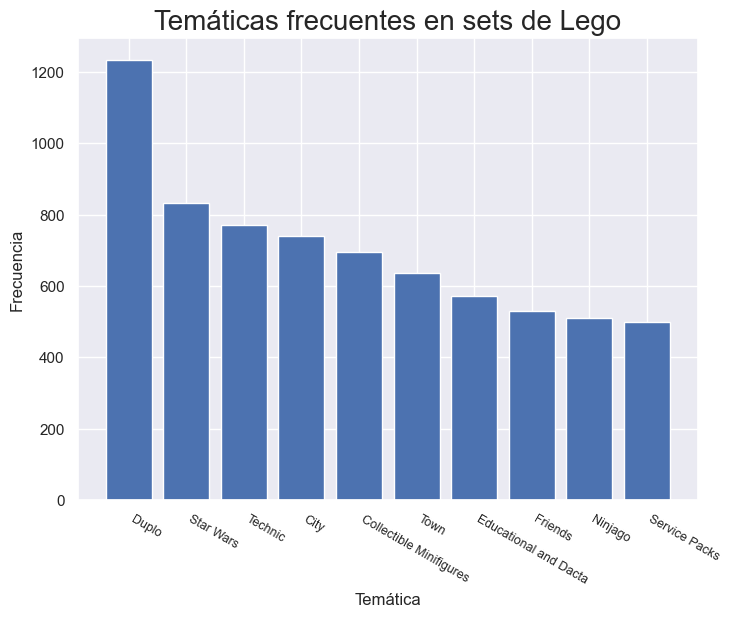

In [176]:
top_tematica = 10

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index, grouped_df['themes_parent_name'].value_counts()[:top_tematica])
ax.set_xlabel('Temática')
ax.set_ylabel('Frecuencia')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
ax.set_title("Temáticas frecuentes en sets de Lego", fontsize = 20)
plt.show()

In [177]:
df_final = df_final_completo[df_final_completo['themes_parent_name'].isin(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index)]
df_final

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,rgb,name,part_cat_id,part_material,cat_name
13,3,1,3931-1,Friends,2343,47,1,f,FCFCFC,Equipment Goblet / Glass,27,Plastic,Minifig Accessories
16,123,1,41135-1,Friends,2343,47,2,f,FCFCFC,Equipment Goblet / Glass,27,Plastic,Minifig Accessories
17,240,1,1821-1,Town,2343,7,4,f,9BA19D,Equipment Goblet / Glass,27,Plastic,Minifig Accessories
18,240,1,1821-1,Town,2343,14,1,f,F2CD37,Equipment Goblet / Glass,27,Plastic,Minifig Accessories
29,659,1,3383-1,Town,2343,47,1,f,FCFCFC,Equipment Goblet / Glass,27,Plastic,Minifig Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082797,176575,1,10997-1,Duplo,102287pr0001,1062,1,f,EBD800,"Duplo Figure Duck with Safety Vest, Medium Blu...",57,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082798,176575,1,10997-1,Duplo,102287pr0002,1062,1,f,EBD800,"Duplo Figure Duck with Safety Vest, Red Cap, B...",57,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082799,176575,1,10997-1,Duplo,102287pr0003,1062,1,f,EBD800,"Duplo Figure Duck with Safety Vest, Bright Gre...",57,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082800,176575,1,10997-1,Duplo,3437pr0175,47,1,f,FCFCFC,Duplo Brick 2 x 2 with Diamonds print,4,Plastic,"Duplo, Quatro and Primo"


In [178]:
#Dejamos solo las variables que nos interesan y eliminamos el resto
df_final = df_final.drop(columns=['id','version','color_id', 'is_spare', 'name', 'part_cat_id'])
# Agregar un numeral a los rgb para graficarlos
df_final['rgb'] = df_final['rgb'].apply(lambda x : '#'+x)
df_final

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories
17,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories
18,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories
29,3383-1,Town,2343,1,#FCFCFC,Plastic,Minifig Accessories
...,...,...,...,...,...,...,...
1082797,10997-1,Duplo,102287pr0001,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082798,10997-1,Duplo,102287pr0002,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082799,10997-1,Duplo,102287pr0003,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1082800,10997-1,Duplo,3437pr0175,1,#FCFCFC,Plastic,"Duplo, Quatro and Primo"


### Análisis exploratorio

A continuación se hace un análisis de las variables que componen el dataset **df_final**

### Tipos de variables 

In [179]:
# Obtener los nombres de las columnas categóricas
cat_cols = df_final.select_dtypes(include='object').columns
print("Variables categóricas en el dataset:")
for col in cat_cols:
    print(col)

Variables categóricas en el dataset:
set_num
themes_parent_name
part_num
rgb
part_material
cat_name


Donde todas las variables descriptas anteriormente son del tipo nominal.

In [180]:
# Obtener los nombres de las columnas numéricas
num_cols = df_final.select_dtypes(include='number').columns
print("Variables numéricas en el dataset:")
for col in num_cols:
    print(col)

Variables numéricas en el dataset:
quantity_part


En forma resumida, las variables encontradas en el dataset son:

**Categóricas**
* set_num
* themes_parent_name
* part_num
* rgb
* part_material
* cat_name

**Numéricas**
* quantity_part

In [181]:
# Separar las variables numéricas y categóricas
num_data = df_final.loc[:, ["quantity_part"]]
cat_data = df_final.drop(['quantity_part'], axis=1)

In [182]:
# Resumen de 5 números de var numerica
resumen = num_data.describe()
print(resumen)

       quantity_part
count  440953.000000
mean        3.323767
std         8.342983
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       724.000000


In [183]:
df_qp = df_final[['quantity_part', 'themes_parent_name']]
group_df_qp = df_qp.groupby('themes_parent_name').sum().reset_index()
aggregated_df_qp = group_df_qp.sort_values('quantity_part', ascending=False)
print(aggregated_df_qp)

        themes_parent_name  quantity_part
7                Star Wars         366216
8                  Technic         330910
0                     City         205132
5                  Ninjago         155014
4                  Friends         135642
3    Educational and Dacta         128536
9                     Town          88096
2                    Duplo          46434
6            Service Packs           7109
1  Collectible Minifigures           2536


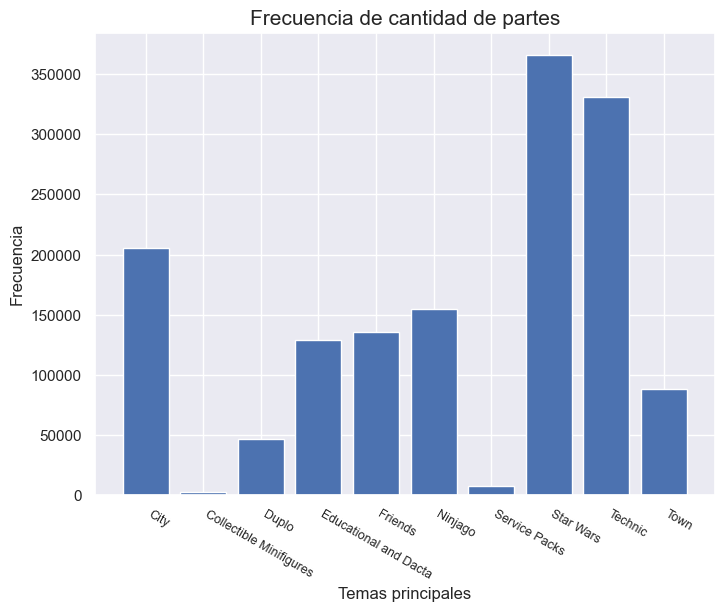

In [220]:
top_theme= 10
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_df_qp['themes_parent_name'][:top_theme], group_df_qp['quantity_part'][:top_theme])
ax.set_xlabel('Temas principales')
ax.set_ylabel('Frecuencia')
ax.set_title("Frecuencia de cantidad de partes", fontsize = 15)
#ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

In [185]:
# Verificar si hay valores faltantes
missing_values_count = df_final.isnull().sum()
non_zero_missing_num = missing_values_count[missing_values_count != 0]

print("Variables con missing values:")
if non_zero_missing_num.empty:
    print("0")
else:
    for variable, count in non_zero_missing_num.items():
        print(f"{variable}: {count}")

Variables con missing values:
0


In [186]:
# Exploraración de las variables categóricas
for col in cat_data:
    print(f"Classes in {col}:")
    print(df_final[col].value_counts())
    print('\n')

Classes in set_num:
set_num
71741-1      2618
71799-1      1347
70620-1      1013
71705-1       998
60271-1       988
             ... 
5003213-1       1
5003113-1       1
9826-1          1
5003101-1       1
1118-1          1
Name: count, Length: 7022, dtype: int64


Classes in themes_parent_name:
themes_parent_name
Star Wars                  91491
City                       87073
Friends                    62646
Technic                    53875
Ninjago                    52060
Town                       38123
Educational and Dacta      26252
Duplo                      24181
Service Packs               2936
Collectible Minifigures     2316
Name: count, dtype: int64


Classes in part_num:
part_num
6141              11534
3023               7494
54200              5359
3024               5118
3710               5032
                  ...  
stickerupn0047        1
17594                 1
16877                 1
16875pr0001           1
76371pr0216           1
Name: count, Length: 15709, dt

### Análisis de temáticas y colores más comunes

In [187]:
print(f"Hay {df_final['part_material'].nunique()} materiales distintos en el dataset")

Hay 5 materiales distintos en el dataset


In [188]:
print(f"Hay {df_final['rgb'].nunique()} colores distintos en el dataset")

Hay 132 colores distintos en el dataset


In [189]:
# Vemos cuántas piezas de cada color hay en los datos
subset_df = df_final[['quantity_part', 'rgb']]
aggregated_df = subset_df.groupby('rgb').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,rgb,quantity_part
5,#05131D,305789
58,#A0A5A9,202922
131,#FFFFFF,151906
33,#6C6E68,135032
83,#C91A09,116645
1,#0055BF,82829
109,#F2CD37,76024
55,#9BA19D,53237
102,#E4CD9E,38342
24,#582A12,33987


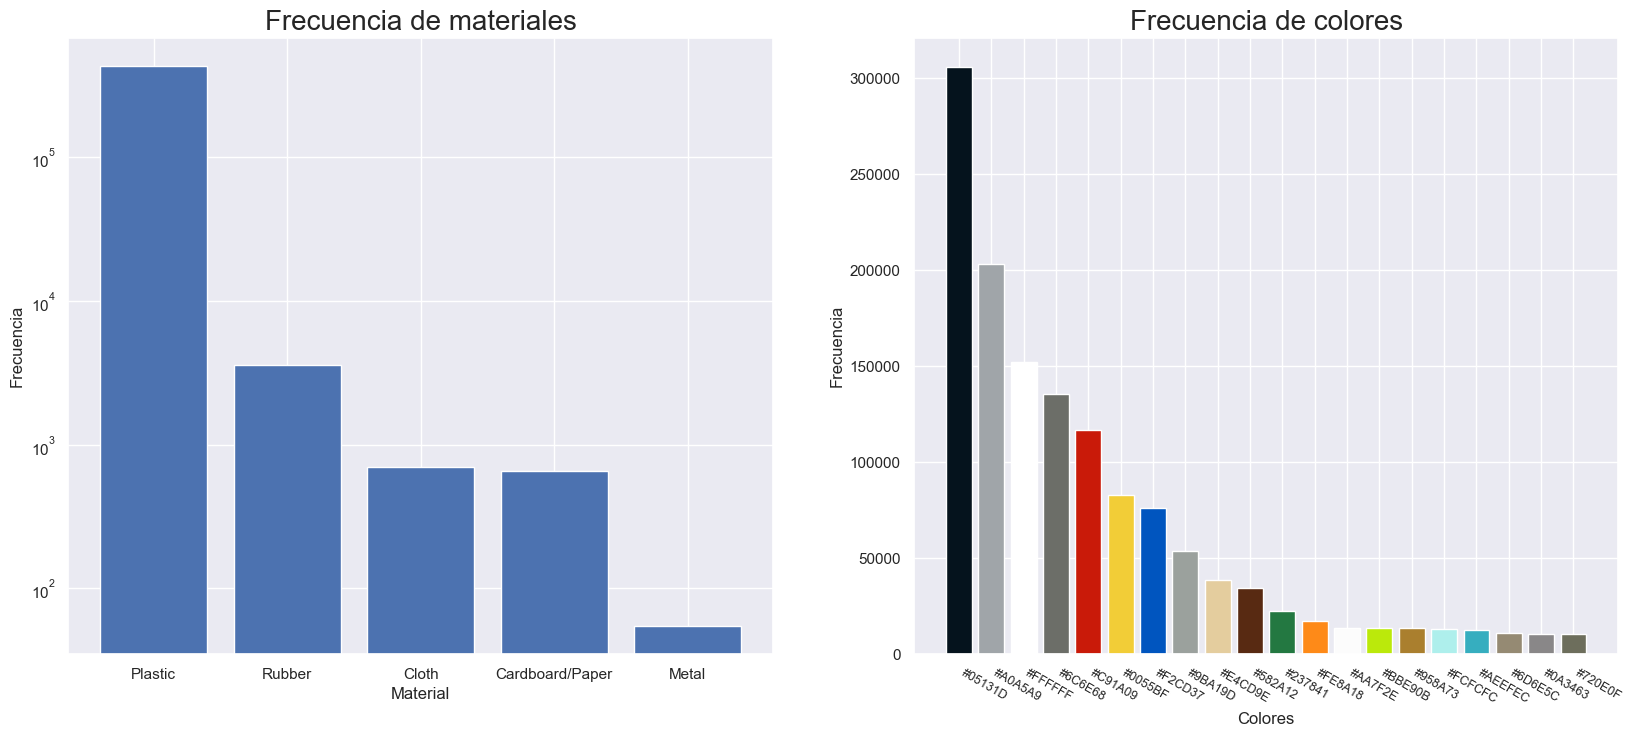

In [190]:
top_colores = 20
colores_grafico = df_final['rgb'].value_counts()[:top_colores].index

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].bar(df_final['part_material'].value_counts().index, df_final['part_material'].value_counts())
ax[0].set_xlabel('Material')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title("Frecuencia de materiales", fontsize = 20)
ax[0].set_yscale('log')

ax[1].bar(aggregated_df['rgb'][:top_colores], aggregated_df['quantity_part'][:top_colores], color=colores_grafico)
ax[1].set_xlabel('Colores')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title("Frecuencia de colores", fontsize = 20)

plt.setp(ax[1].get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

A continuación se analizan los colores en cada temática

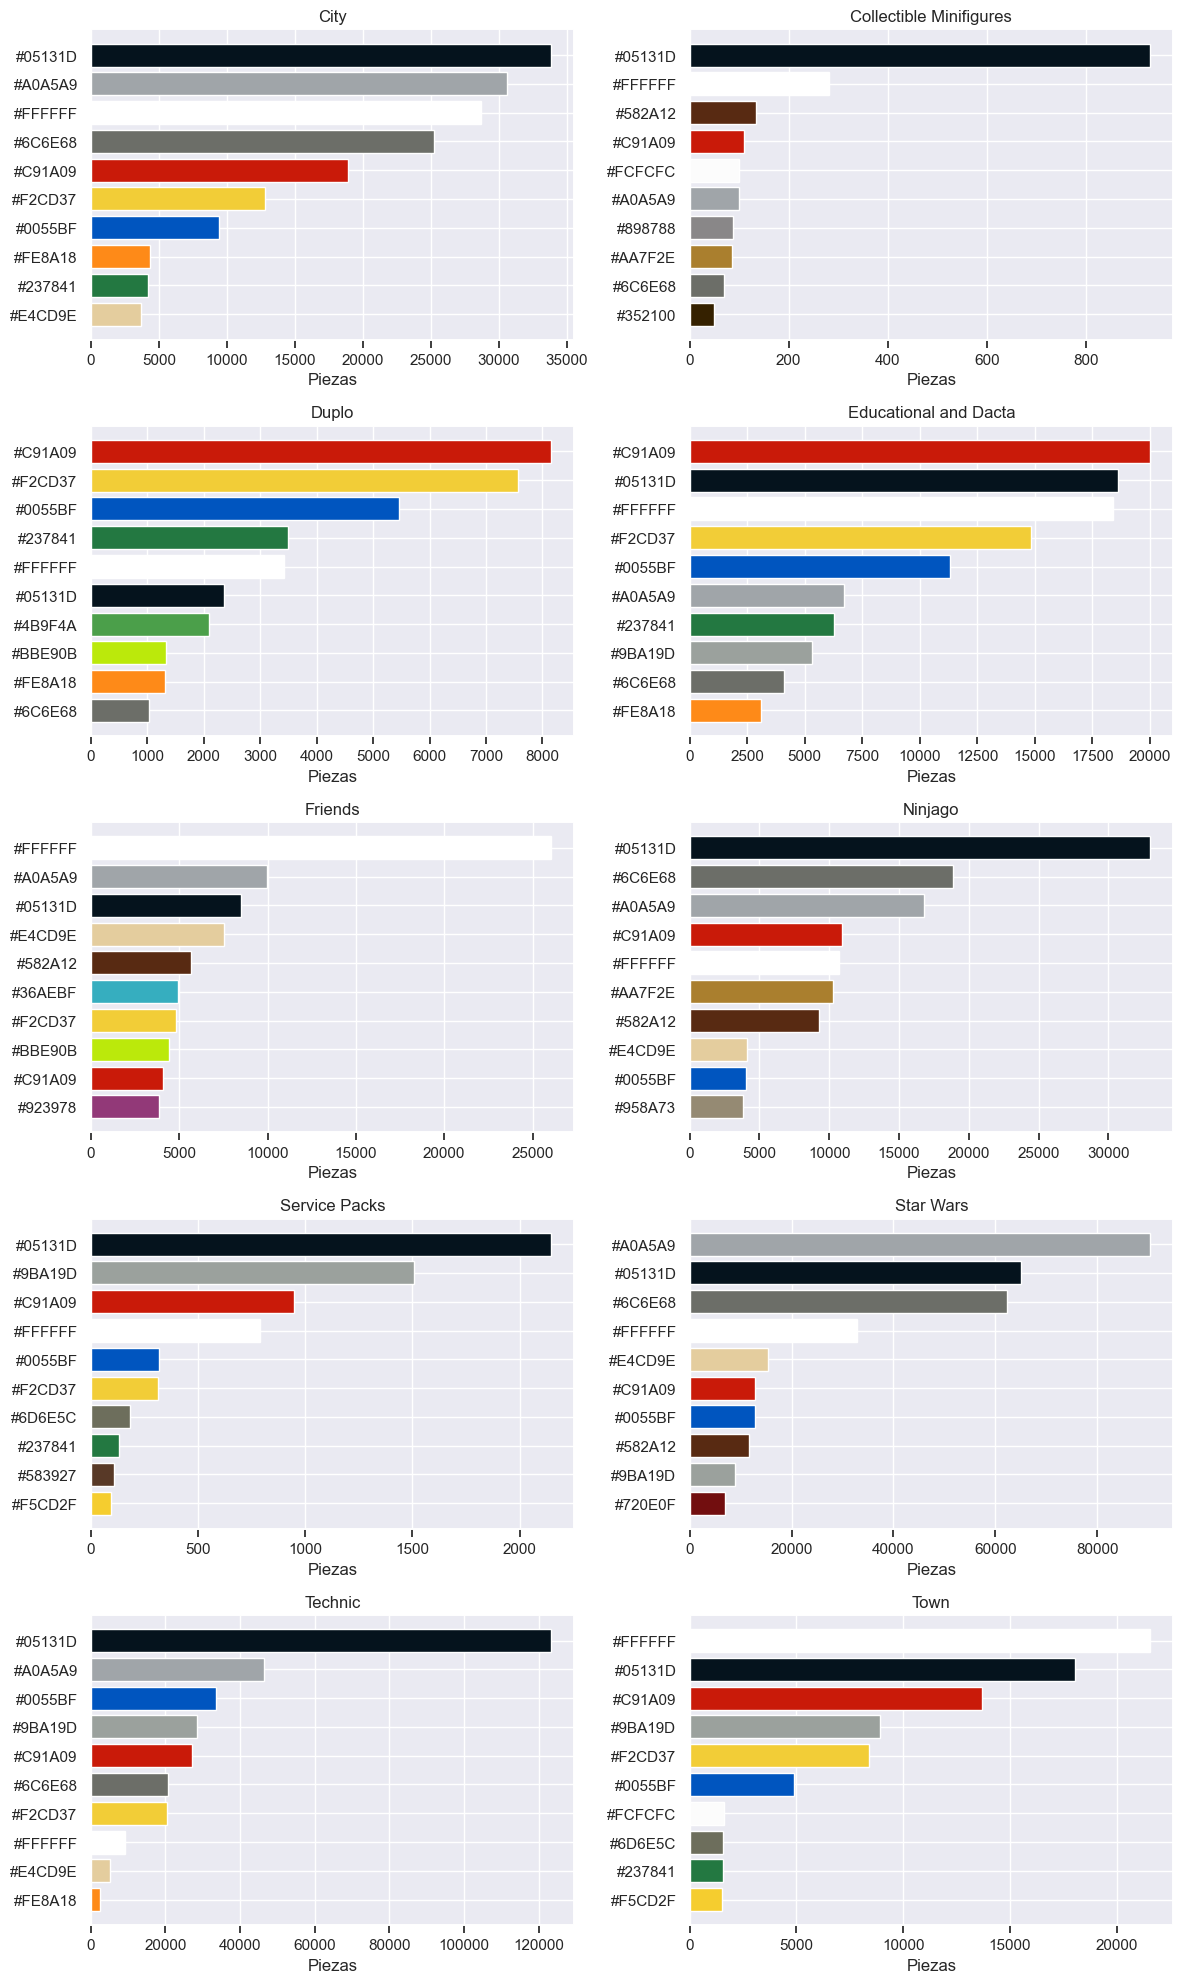

In [191]:
# Elegir cuántos colores visualizar
top_colors = 10

# Agrupar y sumar piezas de cada color dentro de cada tema y quedarse con los colores con más piezas 
theme_color_counts = df_final.groupby(['themes_parent_name', 'rgb'])['quantity_part'].sum().reset_index()
top_10_colors = theme_color_counts.groupby('themes_parent_name').apply(lambda x: x.nlargest(top_colors, 'quantity_part')).reset_index(drop=True)

# Extraer los nombres de las temáticas y RGB únicos
grouped_data = top_10_colors.groupby('themes_parent_name')
theme_names = list(grouped_data.groups.keys())

top_10_rgb_codes = {}
for theme_name, group in grouped_data:
    sorted_data = group.sort_values(by='quantity_part', ascending=False)
    top_10_data = sorted_data.head(10)
    top_10_rgb_codes[theme_name] = top_10_data['rgb'].tolist()

# Bar charts
num_charts = len(theme_names)
num_cols = 2
num_rows = (num_charts + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=False)

for i, theme_name in enumerate(theme_names):
    row = i // num_cols
    col = i % num_cols

    theme_rgb_codes = top_10_rgb_codes[theme_name]
    group = grouped_data.get_group(theme_name)
    frequencies = group.loc[group['rgb'].isin(theme_rgb_codes), 'quantity_part']
    colors = group.loc[group['rgb'].isin(theme_rgb_codes), 'rgb']

    y_pos = np.arange(len(frequencies))
    axs[row, col].barh(y_pos, frequencies, align='center', color=colors)
    axs[row, col].set_yticks(y_pos)
    axs[row, col].set_yticklabels(colors)
    axs[row, col].invert_yaxis()
    axs[row, col].set_xlabel('Piezas')
    axs[row, col].set_title(theme_name)

    # Create a twin Axes object for separate x-axis scale
    axs_twin = axs[row, col].twiny()

    # Adjust x-axis limits
    max_frequency = max(frequencies)
    axs_twin.set_xlim([0, max_frequency * 1.1])  # Add a buffer of 10% to the maximum frequency for better visibility

    # Remove ticks and labels from the twin Axes
    axs_twin.set_xticks([])
    axs_twin.set_xticklabels([])

# Hide unused subplots
if num_charts < num_rows * num_cols:
    for i in range(num_charts, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()

### Análisis de categorías de piezas

In [192]:
print(f"Hay {df_final['cat_name'].nunique()} nombres de categorías de piezas distintas en el dataset")

Hay 63 nombres de categorías de piezas distintas en el dataset


In [193]:
subset_df = df_final[['quantity_part', 'cat_name']]
aggregated_df = subset_df.groupby('cat_name').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
print(aggregated_df)

               cat_name  quantity_part
32               Plates         199583
50         Technic Pins         138725
3                Bricks         112731
35       Plates Special          95201
6         Bricks Sloped          72730
..                  ...            ...
29                Other             21
18       Minidoll Heads             14
13             HO Scale              6
20  Minidoll Upper Body              6
19  Minidoll Lower Body              3

[63 rows x 2 columns]


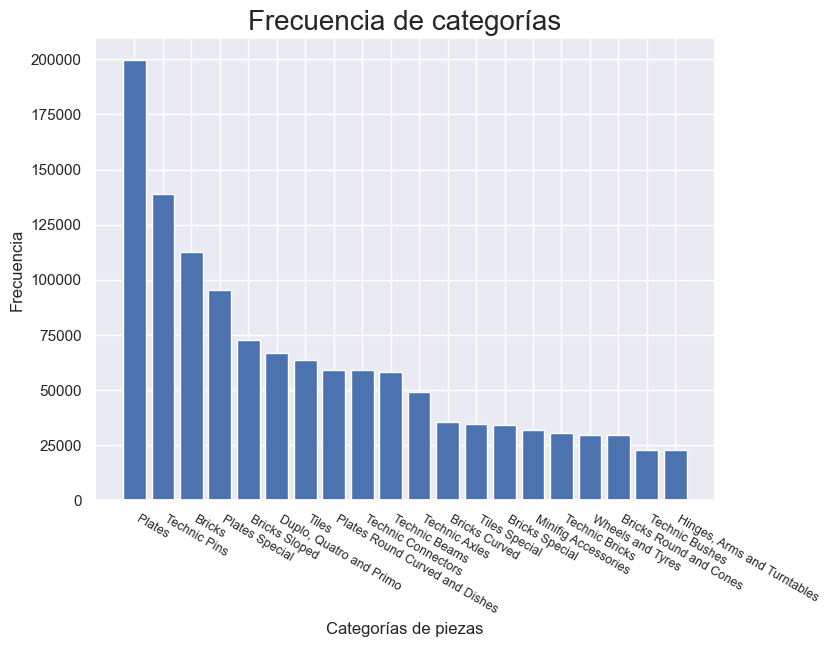

In [194]:
top_cat = 20

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(aggregated_df['cat_name'][:top_colores], aggregated_df['quantity_part'][:top_colores])
ax.set_xlabel('Categorías de piezas')
ax.set_ylabel('Frecuencia')
ax.set_title("Frecuencia de categorías", fontsize = 20)
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

## Preparación de features

In [195]:
df_final_modelo = df_final.copy()

In [196]:
subset_df = df_final[['quantity_part', 'rgb']]
aggregated_df = subset_df.groupby('rgb').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,rgb,quantity_part
5,#05131D,305789
58,#A0A5A9,202922
131,#FFFFFF,151906
33,#6C6E68,135032
83,#C91A09,116645
1,#0055BF,82829
109,#F2CD37,76024
55,#9BA19D,53237
102,#E4CD9E,38342
24,#582A12,33987


In [197]:
# Creo dummies para colores comunes
colores = {
    'negro': '#05131D',
    'gris': '#A0A5A9',
    'blanco': '#FFFFFF',
    'gris_2': '#6C6E68',
    'rojo': '#C91A09',
    'azul': '#0055BF',
    'amarillo': '#F2CD37',
    'gris_3': '#9BA19D',
    'beige': '#E4CD9E',
    'marron': '#582A12'
}

# Contar cuántas piezas hay en cada observación para cada uno de los colores más comunes
for variable_name, colores in colores.items():
    df_final_modelo[variable_name] = np.where(df_final_modelo['rgb'] == colores, 1, 0) * df_final_modelo['quantity_part']

df_final_modelo.head()

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name,negro,gris,blanco,gris_2,rojo,azul,amarillo,gris_3,beige,marron
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,0,0,0,0,0,0,0
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories,0,0,0,0,0,0,0,0,0,0
17,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories,0,0,0,0,0,0,0,4,0,0
18,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories,0,0,0,0,0,0,1,0,0,0
29,3383-1,Town,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,0,0,0,0,0,0,0


In [198]:
# Contar cuántas piezas de cada material hay en cada observación
dummy_variables = pd.get_dummies(df_final_modelo['part_material'], dtype=int)
dummy_variables = dummy_variables.mul(df_final_modelo['quantity_part'], axis=0)
df_final_modelo = pd.concat([df_final_modelo, dummy_variables], axis=1)
df_final_modelo

df_final_modelo.head()

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name,negro,gris,blanco,...,azul,amarillo,gris_3,beige,marron,Cardboard/Paper,Cloth,Metal,Plastic,Rubber
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,2,0
17,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories,0,0,0,...,0,0,4,0,0,0,0,0,4,0
18,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories,0,0,0,...,0,1,0,0,0,0,0,0,1,0
29,3383-1,Town,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [199]:
# # Creo dummies para piezas transparentes
# transp = {
#     'transp': 't',
#     'no_transp': 'f',
# }

# # Contar cuántas piezas transparentes y no transparentes hay en cada observación
# for variable_name, colores in transp.items():
#     df_final_modelo[variable_name] = np.where(df_final_modelo['is_trans'] == colores, 1, 0) * df_final_modelo['quantity_part']

# df_final_modelo.head()

In [200]:
# Categorías de piezas más comunes
subset_df = df_final[['quantity_part', 'cat_name']]
aggregated_df = subset_df.groupby('cat_name').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,cat_name,quantity_part
32,Plates,199583
50,Technic Pins,138725
3,Bricks,112731
35,Plates Special,95201
6,Bricks Sloped,72730
10,"Duplo, Quatro and Primo",66664
53,Tiles,63416
34,Plates Round Curved and Dishes,58984
47,Technic Connectors,58889
43,Technic Beams,57976


In [201]:
# Contar cuántas piezas de cada categoría hay en cada observación
dummy_variables = pd.get_dummies(df_final_modelo['cat_name'], dtype=int)
dummy_variables = dummy_variables.mul(df_final_modelo['quantity_part'], axis=0)
df_final_modelo = pd.concat([df_final_modelo, dummy_variables], axis=1)
df_final_modelo

df_final_modelo.head()

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name,negro,gris,blanco,...,Tiles,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,3383-1,Town,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
# Limpio el dataset de variables que no sirve agrupar
columns_to_drop = ['part_num', 'rgb','part_material','cat_name']
df_final_modelo = df_final_modelo.drop(columns=columns_to_drop)

In [203]:
# Agrupo el dataset por set_num
aggregation_dict = {'themes_parent_name': 'first'}
for column in df_final_modelo.columns:
    if column != 'themes_parent_name' and column != 'set_num':
        aggregation_dict[column] = 'sum'

df_final_modelo = df_final_modelo.groupby('set_num').agg(aggregation_dict).reset_index()
df_final_modelo

,set_num,themes_parent_name,quantity_part,negro,gris,blanco,gris_2,rojo,azul,amarillo,...,Tiles,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage
0,001-1,Technic,43,0,0,17,0,13,1,4,...,0,0,0,0,0,0,0,22,0,0
1,002-1,Technic,3,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01-1,Service Packs,25,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,01-2,Service Packs,50,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,010-2,Duplo,18,0,0,2,0,7,5,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,YODACHRON-1,Star Wars,391,71,121,8,38,9,0,0,...,21,0,0,0,3,0,0,0,0,0
7018,sw117promo-1,Star Wars,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7019,tech007promo-1,Technic,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7020,tf05-1,Star Wars,35,5,14,0,7,0,0,0,...,0,1,6,0,0,0,0,0,0,0


In [204]:
# Calcular proporciones de colores, materiales y categorias en cada set
columns_to_divide = df_final_modelo.columns.drop(['set_num', 'themes_parent_name', 'quantity_part'])
df_final_modelo[columns_to_divide] = df_final_modelo[columns_to_divide].div(df_final_modelo['quantity_part'], axis=0)

In [205]:
df_final_modelo

,set_num,themes_parent_name,quantity_part,negro,gris,blanco,gris_2,rojo,azul,amarillo,...,Tiles,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage
0,001-1,Technic,43,0.000000,0.000000,0.395349,0.000000,0.302326,0.023256,0.093023,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.511628,0.0,0.0
1,002-1,Technic,3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,01-1,Service Packs,25,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,01-2,Service Packs,50,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,010-2,Duplo,18,0.000000,0.000000,0.111111,0.000000,0.388889,0.277778,0.222222,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,YODACHRON-1,Star Wars,391,0.181586,0.309463,0.020460,0.097187,0.023018,0.000000,0.000000,...,0.053708,0.000000,0.000000,0.0,0.007673,0.0,0.0,0.000000,0.0,0.0
7018,sw117promo-1,Star Wars,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
7019,tech007promo-1,Technic,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
7020,tf05-1,Star Wars,35,0.142857,0.400000,0.000000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.028571,0.171429,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


## Selección de features

In [206]:
# Defino target y features
X = df_final_modelo.drop(['themes_parent_name', 'set_num'], axis=1)
y = df_final_modelo['themes_parent_name']

In [207]:
# Random Forest
model = RandomForestClassifier()
model.fit(X, y)
# Obtengo la importancia de las características
feature_importances = model.feature_importances_
# Combino las variables indep y sus importancias en un df
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Ordeno el df por importancia descendente
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
# Selecciono las 10 variables más importantes
top_10_features = feature_importances_df.head(10)['Feature'].tolist()

In [208]:
top_10_features

['Duplo, Quatro and Primo',
 'quantity_part',
 'Plates Special',
 'Minifig Accessories',
 'gris',
 'Transportation - Land',
 'negro',
 'gris_2',
 'Plates',
 'amarillo']

In [209]:
from sklearn.feature_selection import SelectKBest, f_classif

# Creo selector de características basado en ANOVA
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)
feature_scores = selector.scores_
# Combino las variables indep y sus puntuaciones en un df
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
# Ordeno el df por puntuación descendente
feature_scores_df = feature_scores_df.sort_values('Score', ascending=False)
# Selecciono las 10 características con las puntuaciones más altas
top_10_features = feature_scores_df.head(10)['Feature'].tolist()

In [210]:
top_10_features

['Duplo, Quatro and Primo',
 'Plates Special',
 'Plates',
 'Minifig Accessories',
 'Technic Pins',
 'gris',
 'Bricks Curved',
 'Plates Round Curved and Dishes',
 'negro',
 'Technic Connectors']

### Transformación de varaibles categóricas

In [211]:
#Perform label encoding across target features

#Instance Label Encoder
#le = LabelEncoder()

#y_encoded =  le.fit_transform(y)

In [212]:
#y_encoded

array([8, 8, 6, ..., 8, 7, 7])